# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [ ]:
from lib.environments import UnityEnv
from lib.ddpg_agent import DDPG_Agent
from lib.td3_agent import TD3_Agent

from run_agent import train_agent


env = UnityEnv('Tennis', './Tennis_Linux/Tennis.x86_64', train_mode=True)

name = 'ddpg_base'
max_steps = 1e6

agents = []
agent_fn = DDPG_Agent
for i in range(env.num_agents):
    agent = agent_fn(name=f'name-{i}',
                     state_size=env.state_size,
                     action_size=env.action_size,
                     random_seed=2,
                     warm_up=int(1e4))
    agents.append(agent)


train_agent('ddpg', env, agents, max_steps=max_steps)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


brain_name: TennisBrain
Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
DDPG_Agent action_size 2 state_size 24
DDPG_Agent action_size 2 state_size 24
start training
agent.eval_episodes
dones [True, True]
Episodes: 0 average 0.0
dones [True, True]
Episodes: 1 average 0.0
dones [True, True]
Episodes: 2 average -0.0033333332588275275
dones [True, True]
Episodes: 3 average -0.0024999999441206455
dones [True, True]
Episodes: 4 average -0.003999999910593033
max_steps_in_episode 15
15:44:50 After 10000 steps  average reward: -0.003999999910593033
agent.eval_episodes
dones [True, True]
Episodes: 0 average 0.0
dones [True, True]
Episode

# Collaboration and Competition

---

The notebook shows how you can train TD3 agents to 'solve' the Tennis Unity environment. It is the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Setup the environment

If you've not already done so, read the README Getting started section to set up the environment

### Training the TD3 agent

An agent cant be trained from a notebook or from the command line (using run_agent.py).

Be aware that training an agent can take a long time. You may want to see a trained agent in action first.

Skip to 'Testing the agent' if that's what you want to do.


In [1]:
from lib.environments import UnityEnv
from lib.td3_agent import TD3_Agent


from run_agent import *

running on cpu
running on cpu


In [ ]:
train_mode = True

name = 'Tennis_TD3'

env = UnityEnv('Tennis', './Tennis.app', train_mode=train_mode)
### TODO update
agent = DDPG_Agent(name=name,
                   state_size=env.state_size,
                   action_size=env.action_size,
                   random_seed=2)

train_agent(env, agent, max_steps=int(1e6))

### View episode scores during training
The scores of episodes during training are stored in a csv, which can be loaded using pandas.

Please note that the name of the results csv is the same (excluding the extension) as the name of the agent supplied when training. So if the name of the agent is `Tennis_TD3` the state will be stored in `Tennis_TD3.pth` and the results during training will be stored in `Tennis_TD3.csv` 

An average score of 30+ is achieved after 20000 steps


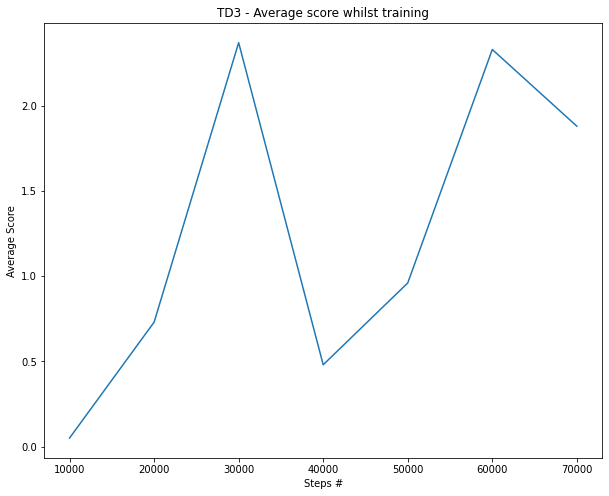

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

df = pd.read_csv('td3_base.csv')

first_row_solved = df[df['average_score'] > 0.5].iloc[0]
print(f'An average score of 30+ is achieved after {round(first_row_solved.steps)} steps')

plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('TD3 - Average score whilst training')
plt.plot(df['steps'], df['average_score'])
plt.ylabel('Average Score')
plt.xlabel('Steps #')
plt.savefig('td3_learning_rate')

### Testing the agent

Again the trained agent can be tested either from a notebook or command line (using run_agent.py)

In [ ]:
from lib.environments import UnityEnv
from lib.td3_agent import TD3_Agent

from run_agent import *

RANDOM_SEED = 2

train_mode = False

name = 'Tennis_TD3_Trained'

env = UnityEnv('Tennis', './Tennis_Linux/Tennis.x86_64', train_mode=train_mode)
agents = []
for i in range(env.num_agents):
    agent = TD3_Agent(name=f'{name}-{i}',
                      state_size=env.state_size,
                      action_size=env.action_size,
                      random_seed=RANDOM_SEED,
                      warm_up=int(1e4),
                     )
    agents.append(agent)


load_agents(agents)

n_episodes = 100
average_reward = eval_episodes(env, agents, num_episodes=n_episodes)
print(f'average score for {n_episodes} episodes is {average_reward}')

running on cpu
running on cpu


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


brain_name: TennisBrain
Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
Episode: 1 average so far 0.10000000149011612
Episode: 2 average so far 0.10000000149011612
Episode: 3 average so far 0.10000000149011612
Episode: 4 average so far 0.10000000149011612
Episode: 5 average so far 0.09800000153481961
Episode: 6 average so far 0.5150000077361861
Episode: 7 average so far 0.8128571550228766
Episode: 8 average so far 1.0362500154878944
Episode: 9 average so far 1.2100000180717971
Episode: 10 average so far 1.3490000201389194
Episode: 11 average so far 1.4627272945574739
Episode: 12 average so far 1.5575000232396026
Episode: 13 ave